Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Restoring parameters from \MyModel\CNNModel
[[143 143 143 144 146 148 141 137 140 149 148 141 141 141 142 142 143 143
  144 142 140 140 143 143 142 142 142 142]
 [144 145 145 146 149 152 143 139 138 143 140 132 131 135 141 135 135 140
  138 138 136 136 145 148 143 142 142 142]
 [145 142 139 137 144 146 141 138 140 150 151 143 144 151 158 145 142 143
  144 138 138 133 140 141 141 142 142 142]
 [147 147 135 133 139 136 147 152 148 122 117 138 131 136 137 128 124 137
  138 141 158 159 138 134 140 139 139 139]
 [140 137 145 145 144 141 132 135 137  39  32  32  22  26  26  27  31  25
   34  74 133 135 149 142 139 141 141 142]
 [142 142 135 134 138 143  52  26  27  19  20  22  20  24  25  23  23  21
   18  20  21  24 149 149 132 136 134 135]
 [137 139 144 146  34  23  23  27  26  21  23 12

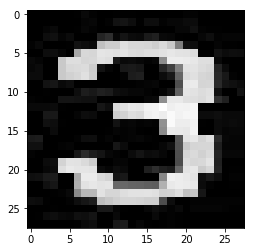

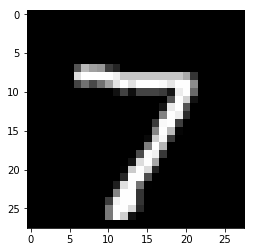

[3]


"\nvideo = cv2.VideoCapture(0)\nwhile(True):\n    ret, frame = video.read()   \n    \n    cv2.imshow('test', frame)\n    cv2.waitKey(5)\n\n"

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
sess=tf.Session()    
saver = tf.train.import_meta_graph('C:\\MyModel\\CNNModel.meta')
saver.restore(sess,tf.train.latest_checkpoint('C:\\MyModel'))

graph = tf.get_default_graph()
training_data = graph.get_tensor_by_name("training_data:0")
training_labels = graph.get_tensor_by_name("training_labels:0")
keep_prob = graph.get_tensor_by_name("keep_prob:0")

predict = graph.get_tensor_by_name("predicted_number:0")

originalimg = cv2.imread("Three.jpg")
resize = cv2.resize(originalimg, dsize =(28, 28))
gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
print(gray)
average = cv2.mean(gray)
if(gray[0][0] < average[0]):
    gray = 255 - gray
_,thres = cv2.threshold(gray, 255-average[0], 0, 2)
print(average[0])
nump = np.asarray(thres, np.float32)
nump = 255 - nump
nump = (nump -np.min(nump))/(np.max(nump) - np.min(nump))
plt.imshow(nump, cmap = 'gray')
plt.show()
plt.imshow(mnist.test.images[0].reshape(28, 28), cmap = 'gray')
plt.show()

prediction = sess.run(predict, feed_dict ={training_data: [nump.flatten()] ,training_labels: [[0,0,0,0,0,0,0,0,0,1]], keep_prob: 1})
print(prediction)

'''
video = cv2.VideoCapture(0)
while(True):
    ret, frame = video.read()   
    
    cv2.imshow('test', frame)
    cv2.waitKey(5)

'''
